# Time Series - Moving Average Exercise 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialize a Dataframe 'df' with some dummy values
# Dummy values are in the  csv file, the string in the read_csv() represents where our csv file is located
# you can change the string path in the read_csv() to import the csv file from different folder

df = pd.read_csv('AMZN.csv', index_col=0,
                 parse_dates=True, infer_datetime_format=True)
df.head()

,Open,High,Low,ClosingPrice,Adj Close,Volume
Date,,,,,,
2018-10-18,1821.489990,1830.150024,1767.869995,1770.719971,1770.719971,5874000
2018-10-19,1785.160034,1809.099976,1753.000000,1764.030029,1764.030029,5907200
2018-10-22,1784.000000,1809.500000,1756.000000,1789.300049,1789.300049,4500000
2018-10-23,1742.239990,1776.339966,1714.000000,1768.699951,1768.699951,6723900
2018-10-24,1773.699951,1777.709961,1656.560059,1664.199951,1664.199951,6928400


In [3]:
print(df.dtypes)

Open            float64
High            float64
Low             float64
ClosingPrice    float64
Adj Close       float64
Volume            int64
dtype: object


In [21]:
df.tail()

,Open,High,Low,ClosingPrice,Adj Close,Volume
Date,,,,,,
2019-10-11,1742.920044,1745.449951,1729.859985,1731.920044,1731.920044,3255000
2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200
2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700
2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400
2019-10-17,1796.489990,1798.849976,1782.020020,1787.479980,1787.479980,2647400


In [4]:
# get first row
first_date = df.index[0]
first_date

Timestamp('2018-10-18 00:00:00')

In [5]:
df.ClosingPrice.head()

Date
2018-10-18    1770.719971
2018-10-19    1764.030029
2018-10-22    1789.300049
2018-10-23    1768.699951
2018-10-24    1664.199951
Name: ClosingPrice, dtype: float64

# Visualize

<AxesSubplot:xlabel='Date'>

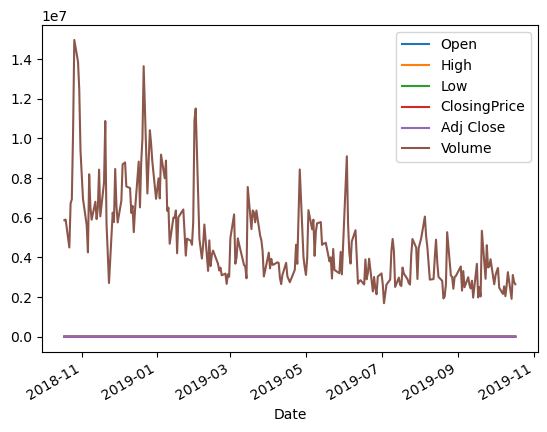

In [6]:
df.plot()

# Average of Recent Period

In [7]:
RECENT_PERIOD = 10  # set the recent period
df.ClosingPrice[-RECENT_PERIOD:]

Date
2019-10-04    1739.650024
2019-10-07    1732.660034
2019-10-08    1705.510010
2019-10-09    1721.989990
2019-10-10    1720.260010
2019-10-11    1731.920044
2019-10-14    1736.430054
2019-10-15    1767.380005
2019-10-16    1777.430054
2019-10-17    1787.479980
Name: ClosingPrice, dtype: float64

In [8]:
df_recent_period = df[-RECENT_PERIOD:] 

In [9]:
df_recent_period

,Open,High,Low,ClosingPrice,Adj Close,Volume
Date,,,,,,
2019-10-04,1726.020020,1740.579956,1719.229980,1739.650024,1739.650024,2471900
2019-10-07,1731.630005,1747.829956,1723.699951,1732.660034,1732.660034,2154700
2019-10-08,1722.489990,1727.000000,1705.000000,1705.510010,1705.510010,2542000
2019-10-09,1719.609985,1729.949951,1714.359985,1721.989990,1721.989990,2043500
2019-10-10,1725.239990,1738.290039,1713.750000,1720.260010,1720.260010,2575200
2019-10-11,1742.920044,1745.449951,1729.859985,1731.920044,1731.920044,3255000
2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200
2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700
2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400


In [10]:
# average value of recent period
df_recent_period.ClosingPrice.mean()  

1742.0710205000003

In [11]:
# total value (volume) of recent period
df_recent_period.Volume.sum()

25475000

In [12]:
df_recent_period.ClosingPrice.mean()

1742.0710205000003

In [13]:
# Create a dataframe with a row based on the average price of the recent period
last_date = df.index[-1]
next_date = last_date + pd.DateOffset(days=1)

next_closing_price = df.ClosingPrice[-RECENT_PERIOD:].mean()
df_next = pd.DataFrame({'ClosingPrice' : next_closing_price}, index=[next_date])

df_new = df.append(df_next, sort=False)
df_new.tail()

C:\Users\isscyk\AppData\Local\Temp\ipykernel_8032\1892703039.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df.append(df_next, sort=False)


,Open,High,Low,ClosingPrice,Adj Close,Volume
2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200.0
2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700.0
2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400.0
2019-10-17,1796.489990,1798.849976,1782.020020,1787.479980,1787.479980,2647400.0
2019-10-18,NaN,NaN,NaN,1742.071021,NaN,NaN


<AxesSubplot:>

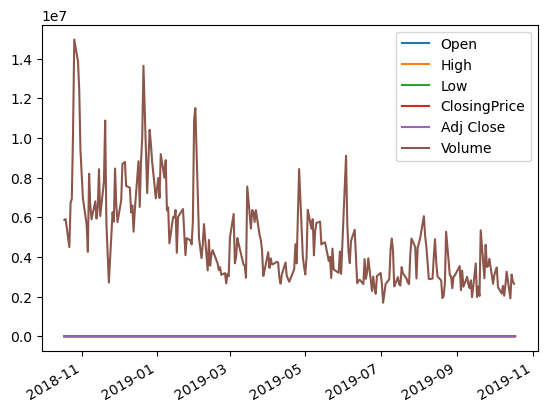

In [14]:
# plot the graph of the new dataframe
df_new.plot()

# Moving Average
Moving Average (or rolling aveage) is used to analyze data points by creating a series of averages of different subsets of the full data set.  A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles.  The estimate of the trend-cycle at time t is obtained by averaging values of the time series within k periods of t.

In [15]:
# compute moving (or rolling) average of past 50 days of data
df.ClosingPrice.rolling(window=50).mean().tail()

Date
2019-10-11    1782.233000
2019-10-14    1780.496802
2019-10-15    1780.541802
2019-10-16    1780.333804
2019-10-17    1780.215403
Name: ClosingPrice, dtype: float64

In [16]:
rolling_mean_50 = df.ClosingPrice.rolling(window=50).mean().shift(1)
rolling_mean_200 = df.ClosingPrice.rolling(window=200).mean().shift(1)

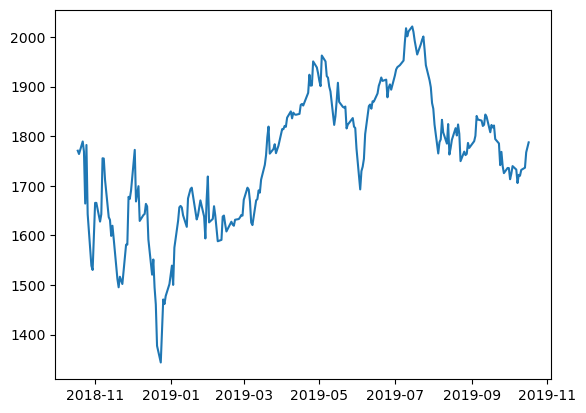

In [17]:
# plot the graph
plt.plot(df.index, df.ClosingPrice)
plt.show()

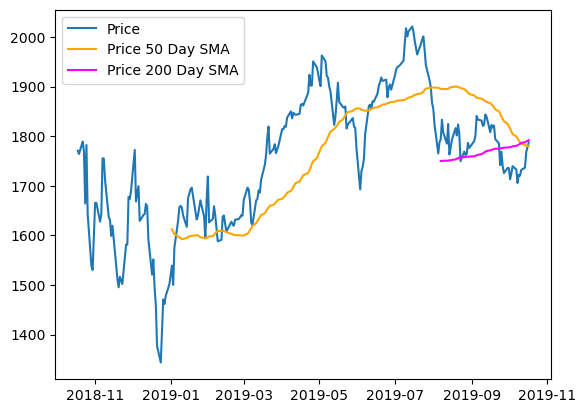

In [18]:
# plot the graphs with different moving average
plt.plot(df.index, df.ClosingPrice, label='Price')
plt.plot(df.index, rolling_mean_50, label='Price 50 Day SMA', color='orange')
plt.plot(df.index, rolling_mean_200, label='Price 200 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [20]:
rolling_mean_50.tail()


Date
2019-10-11    1784.700998
2019-10-14    1782.233000
2019-10-15    1780.496802
2019-10-16    1780.541802
2019-10-17    1780.333804
Name: ClosingPrice, dtype: float64